# Meteoschweiz 
## Current meteorological observations 

In [20]:
# ‘Soft’ reset: Only clears your namespace, leaving history intact.
%reset -sf 
import pandas as pd
from datetime import datetime
import matplotlib.cbook

## Available weather stations

In [21]:
url = 'https://data.geo.admin.ch'
path = 'ch.meteoschweiz.klima/nbcn-tageswerte'
wsurl = url + '/' + path + '/' + 'liste-download-nbcn-d.csv'
ws = pd.read_csv(wsurl, sep=";", header=0, encoding = "ISO-8859-1").dropna()
ws.drop(['URL Previous years (verified data)', 'URL Current year'], axis=1)

,Station,station/location,WIGOS-ID,Data since,Station height m. a. sea level,CoordinatesE,CoordinatesN,Latitude,Longitude,Climate region,Canton
0,Altdorf,ALT,0-20000-0-06672,01.01.1864,438.0,2690181.0,1193564.0,46.887069,8.621894,Central Alpine north slope,UR
1,Andermatt,ANT,0-20000-0-06695,01.01.1864,1438.0,2687445.0,1165044.0,46.630914,8.580553,Central Alpine north slope,UR
2,Basel / Binningen,BAS,0-20000-0-06601,01.01.1755,316.0,2610909.0,1265612.0,47.541142,7.583525,Eastern Jura,BL
3,Bern / Zollikofen,BER,0-20000-0-06631,01.01.1864,553.0,2601934.0,1204410.0,46.990744,7.464061,Central plateau,BE
4,La Chaux-de-Fonds,CDF,0-20000-0-06612,01.01.1900,1017.0,2550919.0,1214862.0,47.082947,6.792314,Western Jura,NE
5,Château-d'Oex,CHD,0-20000-0-06627,01.01.1879,1028.0,2577040.0,1147655.0,46.479819,7.139656,Western Alpine north slope,VD
6,Chaumont,CHM,0-20000-0-06608,01.01.1864,1136.0,2565060.0,1211007.0,47.049169,6.978825,Western Jura,NE
7,Davos,DAV,0-20000-0-06784,01.01.1864,1594.0,2783519.0,1187459.0,46.812969,9.843558,Northern and central Grisons,GR
8,Elm,ELM,0-20000-0-06682,01.02.1878,958.0,2732266.0,1198425.0,46.923747,9.175350,Eastern Alpine north slope,GL
9,Engelberg,ENG,0-20000-0-06655,01.01.1864,1036.0,2674162.0,1186069.0,46.821639,8.410514,Central Alpine north slope,OW


## Select one weather station

In [22]:
# Define the default parameters and tag the cell accordingly
wsno = -1 # default -1 selects the last index, 2 sets BAS weather station
#
# Calling syntax from shell:
#
# time for i in {0..28}; do \ 
#   papermill MeteoCH.ipynb \
#   MeteoCH.output.ipynb \                 # ...or /dev/null
#   -p wsno $i; done
#
# The time command at the beginning of the call may be omitted.

In [23]:
wstation = ws['Station'].tolist()[wsno]
print(wsno)
ws[ws.Station==wstation] 
label = ws[ws.Station==wstation]['station/location'].to_string()[::-1][0:3][::-1]
print(f"The label of weather station {wstation} is {label}.")

-1
The label of weather station St. Gallen is STG.


## Read online observations from selected weather station

In [24]:
maxrows = 400 # displayed number of past days 
filenm = "nbcn-daily_"
ext="csv"
currurl = url + "/" + path + "/" + filenm + label + "_current." + ext
prevurl = url + "/" + path + "/" + filenm + label + "_previous." + ext
cf = pd.read_csv(currurl, sep=";", index_col='date',converters={'date':pd.to_datetime}).drop(['station/location'], axis=1) #, engine='pyarrow')
for col in  cf.columns:
    cf[col] = pd.to_numeric(cf[col], errors='coerce')
pf = pd.read_csv(prevurl, sep=";", index_col='date',converters={'date':pd.to_datetime}).drop(['station/location'], axis=1) #, engine='pyarrow')
for col in  pf.columns:
    pf[col] = pd.to_numeric(pf[col], errors='coerce')
df = pd.concat([pf, cf], axis=0).tail(maxrows)

## Compute summary statistics

In [25]:
df.describe()

,gre000d0,hto000d0,nto000d0,prestad0,rre150d0,sre000d0,tre200d0,tre200dn,tre200dx,ure200d0
count,400.00000,400.000000,0.0,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,140.25500,1.317500,NaN,928.870500,3.276250,304.637500,9.501750,6.07275,13.093750,72.596000
std,106.48134,3.905743,NaN,6.997596,6.552679,285.815574,7.602623,6.93543,8.489943,14.599682
min,3.00000,0.000000,NaN,898.400000,0.000000,0.000000,-7.400000,-10.00000,-5.600000,36.300000
25%,45.75000,0.000000,NaN,925.800000,0.000000,32.000000,3.575000,0.27500,6.575000,62.375000
50%,112.50000,0.000000,NaN,929.550000,0.000000,217.000000,9.200000,5.80000,13.350000,74.450000
75%,221.75000,0.000000,NaN,933.300000,3.800000,555.000000,16.025000,12.32500,20.025000,83.850000
max,370.00000,27.000000,NaN,944.900000,50.400000,905.000000,27.200000,21.50000,31.500000,100.000000


In [26]:
(rows, cols) = df.shape
print(f"{rows} observations from {min(df.index)} to {max(df.index)}.")

400 observations from 2022-01-02 00:00:00 to 2023-02-05 00:00:00.


## Description of observed parameters

In [27]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

zip_url = url + "/" + path + "/" + "data.zip"
plist = [] # parameter
ulist = [] # unit
dlist = [] # description

with urlopen(zip_url) as f:
    with BytesIO(f.read()) as b, ZipFile(b) as myzipfile:
        rf = myzipfile.open('1_how-to-download-nbcn-d.txt')
        blines = rf.readlines()
        rf.close()
        for i in range(14, 25):
            line =blines[i].decode('unicode-escape').rstrip('\r\n')
            plist.append(line[0:21].strip())
            ulist.append(line[21:38].strip())
            dlist.append(line[38:].strip('\n'))

# list of lists instead of list of tuples
##zipped = zip(plist[1:], ulist[1:], dlist[1:])
list_of_lists = [list(tup) for tup in zip(plist[1:], ulist[1:], dlist[1:])]
cols = [plist[0], ulist[0], dlist[0]]

par = pd.DataFrame(list_of_lists, columns = cols)
print(par)

  Parameter Einheit                                       Beschreibung
0  gre000d0    W/m²                       Globalstrahlung; Tagesmittel
1  hto000d0      cm          Gesamtschneehöhe; Morgenmessung von 6 UTC
2  nto000d0       %                       Gesamtbewölkung; Tagesmittel
3  prestad0     hPa      Luftdruck auf Stationshöhe (QFE); Tagesmittel
4  rre150d0      mm    Niederschlag; Tagessumme 6 UTC - 6 UTC Folgetag
5  sre000d0     min                      Sonnenscheindauer; Tagessumme
6  tre200d0      °C         Lufttemperatur 2 m über Boden; Tagesmittel
7  tre200dn      °C        Lufttemperatur 2 m über Boden; Tagesminimum
8  tre200dx      °C        Lufttemperatur 2 m über Boden; Tagesmaximum
9  ure200d0       %  Relative Luftfeuchtigkeit 2 m über Boden; Tage...


## Scatter plot  air temperature

In [28]:
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')
fswidth = 10
fsheight = 5

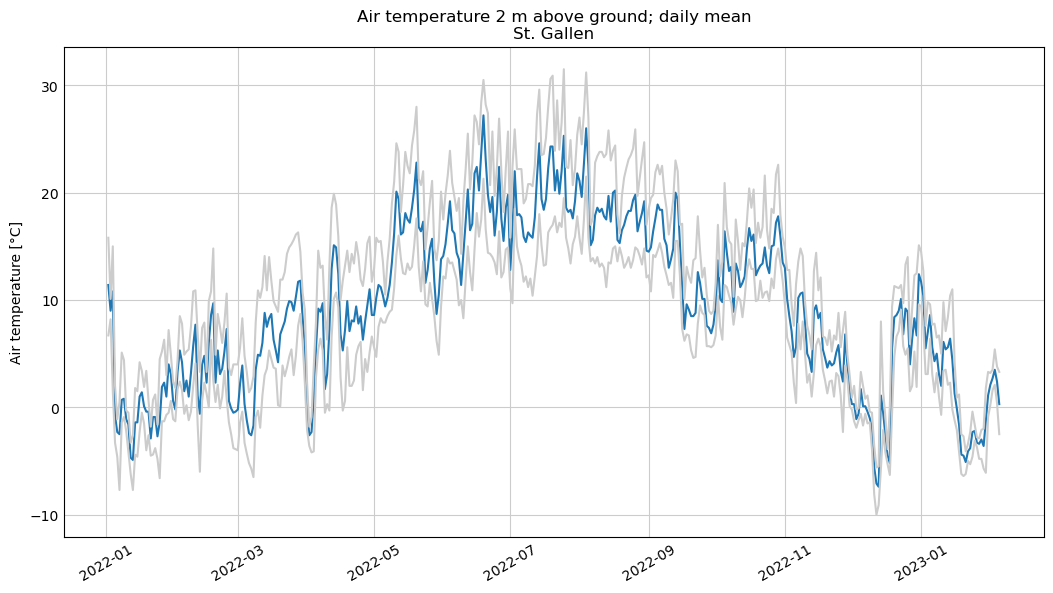

In [29]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.tre200d0)
axs.plot(df.index, df.tre200dn, color='0.8')
axs.plot(df.index, df.tre200dx, color='0.8')
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')
#axs.grid(which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Air temperature [°C]')
plt.title('Air temperature 2 m above ground; daily mean\n' + wstation)
plt.xticks(rotation=30)

plt.show()

## Scatter plot global radiation

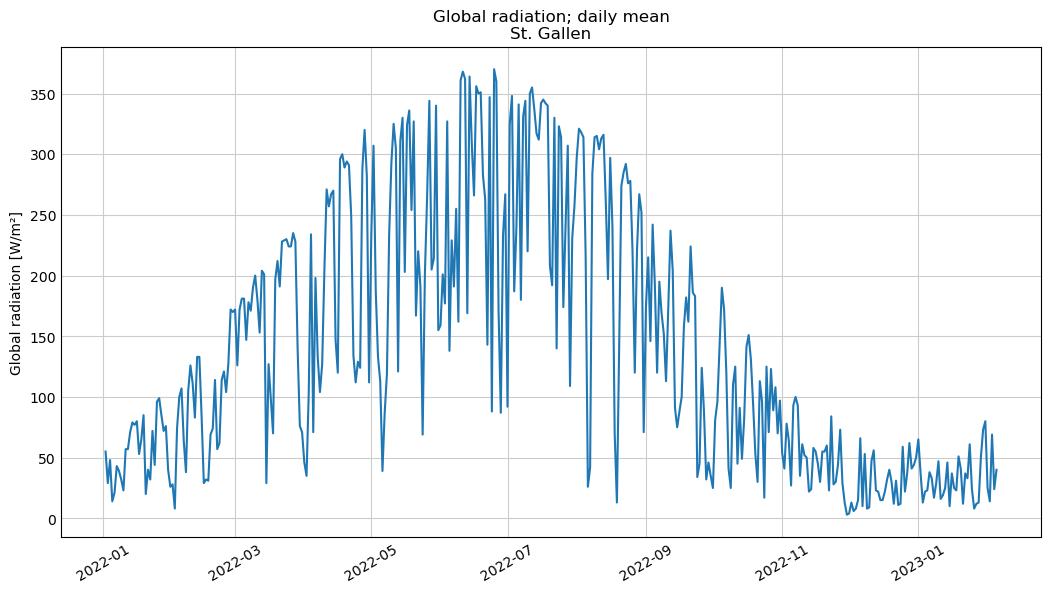

In [30]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.gre000d0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Global radiation [W/m²]')
plt.title('Global radiation; daily mean\n' + wstation)
plt.xticks(rotation=30)

plt.show()

## Scatter plot total snow depth

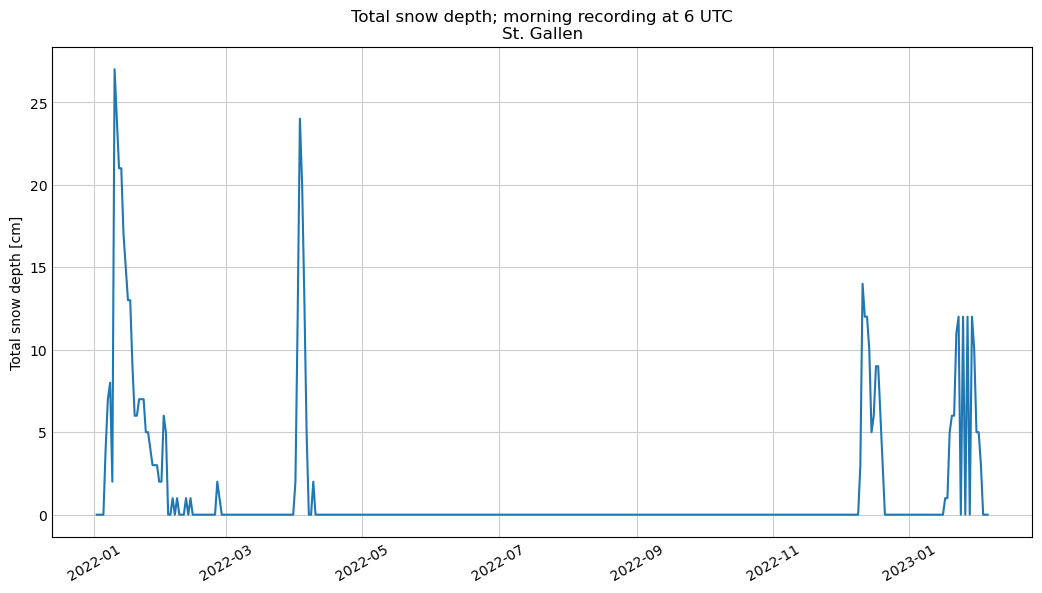

In [31]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.hto000d0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Total snow depth [cm]')
plt.title('Total snow depth; morning recording at 6 UTC\n' + wstation)
plt.xticks(rotation=30)

plt.show()

## Scatter plot cloud cover

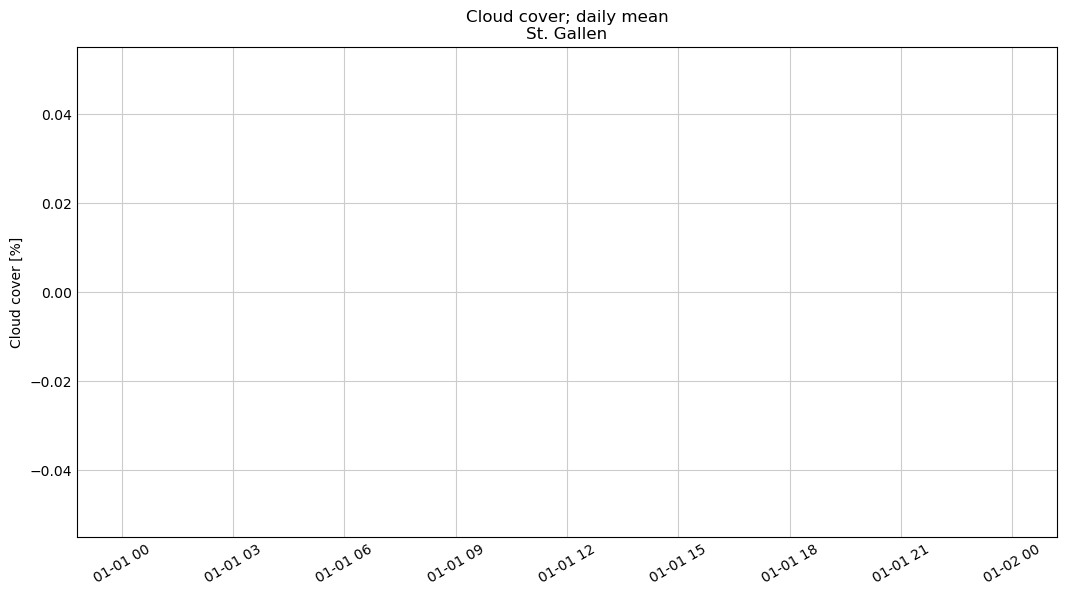

In [32]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.nto000d0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Cloud cover [%]')
plt.title('Cloud cover; daily mean\n' + wstation)
plt.xticks(rotation=30)

plt.show()

## Scatter plot pressure at station level 

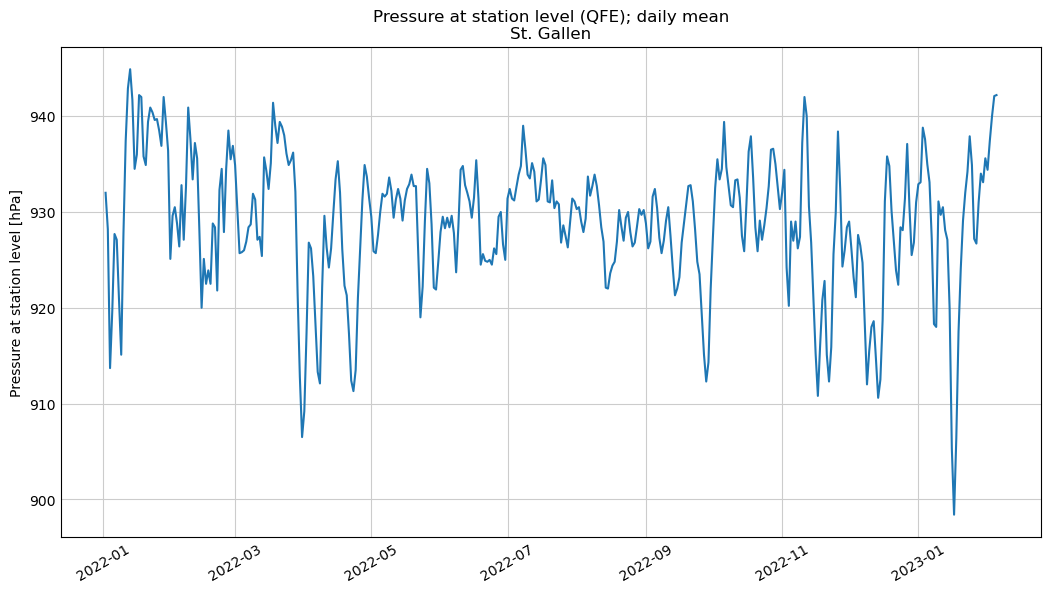

In [33]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.prestad0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Pressure at station level [hPa]')
plt.title('Pressure at station level (QFE); daily mean\n' + wstation)
plt.xticks(rotation=30)

plt.show()

In [34]:
## Scatter plot cloud cover

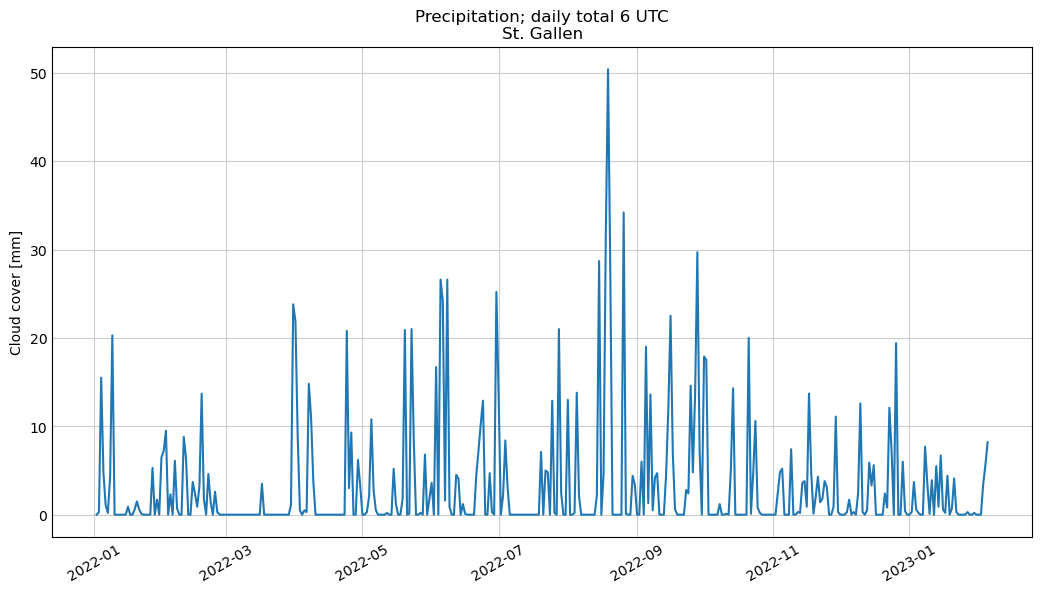

In [35]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.rre150d0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Cloud cover [mm]')
plt.title('Precipitation; daily total 6 UTC\n' + wstation)
plt.xticks(rotation=30)

plt.show()

## Scatter plot sunshine duration

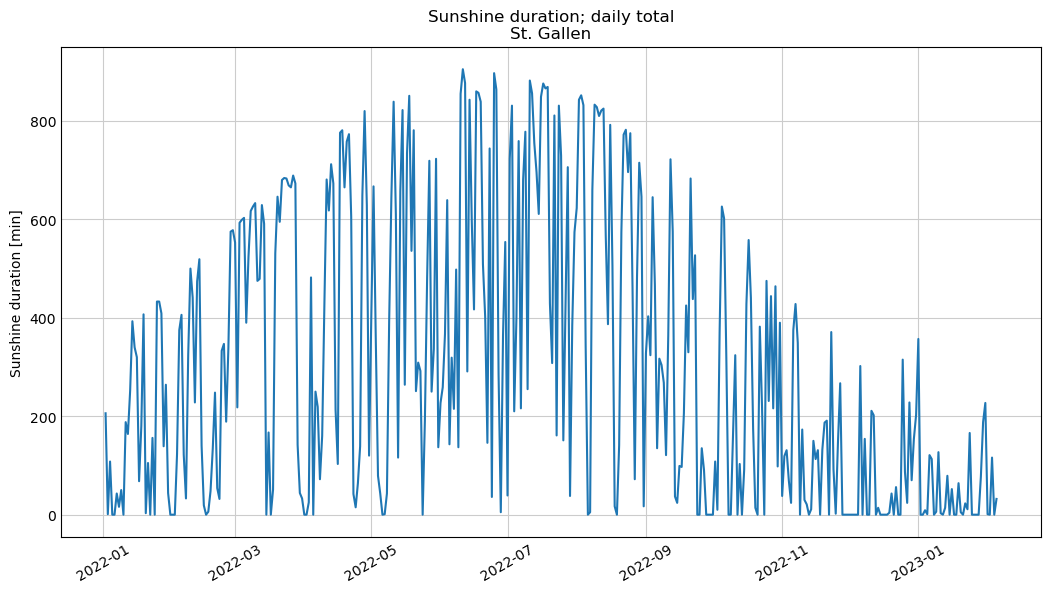

In [36]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.sre000d0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Sunshine duration [min]')
plt.title('Sunshine duration; daily total\n' + wstation)
plt.xticks(rotation=30)

plt.show()

## Scatter plot relative air humidity

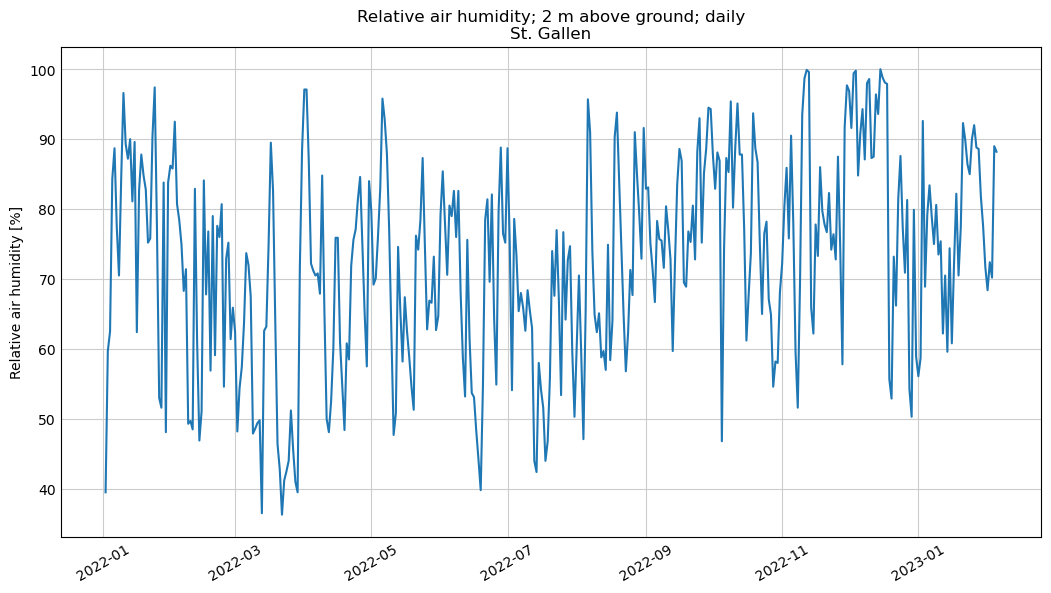

In [37]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.ure200d0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Relative air humidity [%]')
plt.title('Relative air humidity; 2 m above ground; daily\n' + wstation)
plt.xticks(rotation=30)

plt.show()

## Export as HTML Report

In [38]:
import os
#import ipynbname
#nb_fname = ipynbname.name()
nb_fname = 'MeteoCH' # hard-coded: import ipynbname raises an exception...
#nb_path = ipynbname.path()
#print(f"{nb_fname=}")
#print(f"{nb_path=}")

out_fname = nb_fname + ".output"
static_format = 'pdf'  # pdf or html, etc.
os.system(f'jupyter    --to {static_format} {out_fname}.ipynb')
os.system(f'mv {out_fname}.{static_format} {label}.{static_format}')

[NbConvertApp] Converting notebook MeteoCH.output.ipynb to pdf
[NbConvertApp] Support files will be in MeteoCH.output_files/
[NbConvertApp] Making directory ./MeteoCH.output_files
[NbConvertApp] Making directory ./MeteoCH.output_files
[NbConvertApp] Making directory ./MeteoCH.output_files
[NbConvertApp] Making directory ./MeteoCH.output_files
[NbConvertApp] Making directory ./MeteoCH.output_files
[NbConvertApp] Making directory ./MeteoCH.output_files
[NbConvertApp] Making directory ./MeteoCH.output_files
[NbConvertApp] Making directory ./MeteoCH.output_files
[NbConvertApp] Writing 60496 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 556605 bytes to MeteoCH.output.pdf


0